In [1]:
import numpy as np
from main import ColorCorrections
import matplotlib.pyplot as plt

In [2]:
# Define the redshift range and
# relevant comoslogical parameters
redshift_range = np.linspace(0.01, 3.5, 300)
h_0 = 67.27
omega_m = 0.3156


# Initialise the class
corr = ColorCorrections(
    redshift_range=redshift_range,
    h_0=h_0,
    omega_m=omega_m        
)

# Load the original k and e corrections
old_z_k, old_kcorr, _, _, _ = np.loadtxt('data_input/kcorr.dat', unpack=True)
old_z_e, old_ecorr, _, _, _ = np.loadtxt('data_input/ecorr.dat', unpack=True)

In [3]:
kcorr_spline = corr.make_kcorr_spline()
orig_ecorr_spline = corr.make_ecorr_spline(original_z=True)
ecorr_spline = corr.make_ecorr_spline(original_z=False)

new_kcorr, new_ecorr = corr.get_color_corrections()


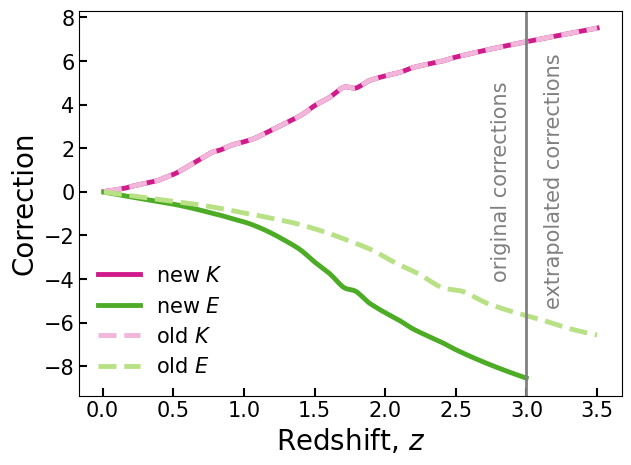

In [4]:
lpink = "#f1b6da"
dpink = "#d01c8b"
lgreen = "#b8e186"
dgreen = "#4dac26"

# Set up the figure
plt.rcParams["lines.linewidth"] = 3.5

fig, ax = plt.subplots(figsize=(7,5))
# Ticks settings
ax.tick_params(direction='in', which='both', labelsize=15)
ax.tick_params(length=6, width=1.5)

# Plot old k and e corrections
ax.plot(redshift_range, kcorr_spline(redshift_range), label='new $K$', c=dpink)
ax.plot(redshift_range, orig_ecorr_spline(redshift_range), label='new $E$', c=dgreen)

# Plot new corrections
ax.plot(redshift_range, new_kcorr, label="old $K$", c=lpink, ls="--")
ax.plot(redshift_range, new_ecorr, label="old $E$", c=lgreen, ls="--")

vertical_line_position = 3
ax.axvline(x=vertical_line_position, color='gray', linestyle='-', lw=2)

# Annotate the vertical line with text
annotation_text1 = "original corrections"
annotation_text2 = "extrapolated corrections"
ax.text(vertical_line_position - 0.25, 0.5, annotation_text1, rotation=90, fontsize=15,
        verticalalignment='center', color='gray')

ax.text(vertical_line_position + 0.125, 0.5, annotation_text2, rotation=90, fontsize=15,
        verticalalignment='center', color='gray')

ax.set_xlabel('Redshift, $z$', fontsize=20)
ax.set_ylabel('Correction', fontsize=20)
plt.legend(frameon=False, fontsize=15)

fig_path = "plots_output/"
plt.savefig(fig_path + f"k_and_e_corr_comparison.pdf", bbox_inches="tight")
#plt.savefig(fig_path + f"k_and_e_corr_comparison.png", bbox_inches="tight", dpi=300)


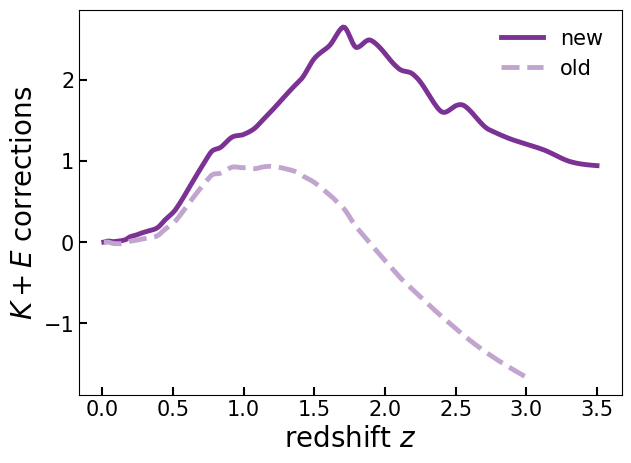

In [5]:
dpurple = "#7b3294"
lpurple = "#c2a5cf"

# Set up the figure
plt.rcParams["lines.linewidth"] = 3.5

fig, ax = plt.subplots(figsize=(7,5))
# Ticks settings
ax.tick_params(direction='in', which='both', labelsize=15)
ax.tick_params(length=6, width=1.5)
#plt.title(f"Redshift dependent color corrections", fontsize=20)

plt.plot(redshift_range, new_kcorr+new_ecorr, c=dpurple, label="new")  # new corrections
plt.plot(redshift_range, kcorr_spline(redshift_range) + orig_ecorr_spline(redshift_range), label="old", c=lpurple, ls="--")  # old corrections

plt.xlabel('redshift $z$', fontsize=20)
plt.ylabel('$K + E$ corrections', fontsize=20)
plt.legend(frameon=False, fontsize=15)

fig_path = "plots_output/"
plt.savefig(fig_path + f"k+e_corr_comparison.pdf", bbox_inches="tight")
#plt.savefig(fig_path + f"k+e_corr_comparison.png", bbox_inches="tight", dpi=300)